In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('default')

df = pd.read_csv("/datc/opschaler/combined_gas_smart_weather_dfs/processed/P01S01W8655_hour.csv",header=0,delimiter="\t",parse_dates = ['datetime'])
df = df.set_index(['datetime'])

df3h = df.resample('3H').mean()
df6h = df.resample('6H').mean()
df12h = df.resample('12H').mean()
df1d = df.resample('1D').mean()
df1w = df.resample('1W').mean()
df1mon = df.resample('1M').mean()


rdf3h = df3h[df3h['T'] < 16]
rdf6h= df6h[df6h['T'] < 16]
rdf12h = df12h[df12h['T'] < 16]
rdf1d= df1d[df1d['T'] < 16]
rdf1w = df1w[df1w['T'] < 16]


In [17]:
rdf3h.head()

,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,gasPower,DD,DR,...,P,Q,RG,SQ,T,T10,TD,U,VV,WW
datetime,,,,,,,,,,,,,,,,,,,,,
2017-04-24 12:00:00,778.149434,0.0,736.960999,0.0,172.138260,0.0,1591.657959,0.010661,255.922221,34.000000,...,1014.244446,434.666667,0.000000,1.099094,12.672222,14.033333,6.672222,66.388889,35461.111111,16.333333
2017-04-24 15:00:00,778.731466,0.0,736.960999,0.0,385.247777,0.0,1591.685628,0.027669,259.605554,16.000000,...,1012.055556,257.888889,0.000000,0.043417,12.155556,12.972222,6.555556,68.111111,35161.111111,11.555556
2017-04-24 18:00:00,780.996257,0.0,736.960999,0.0,933.805603,0.0,1593.522705,0.710693,264.044445,14.000000,...,1009.877774,44.611111,0.000000,0.090944,11.005556,10.661111,7.011111,76.055556,28872.222222,19.222222
2017-04-24 21:00:00,782.627563,0.0,736.998311,0.0,212.459198,0.0,1593.873047,0.000000,287.772226,505.333333,...,1008.838888,0.222222,1.283333,0.000000,7.988889,7.772222,6.522222,90.000000,18178.333333,65.388889
2017-04-25 00:00:00,782.770996,0.0,737.413839,0.0,165.599340,0.0,1593.939941,0.022298,246.421667,78.666667,...,1007.193890,0.027778,0.041667,0.000000,6.650000,5.798333,4.042222,82.972222,45545.000000,37.622222


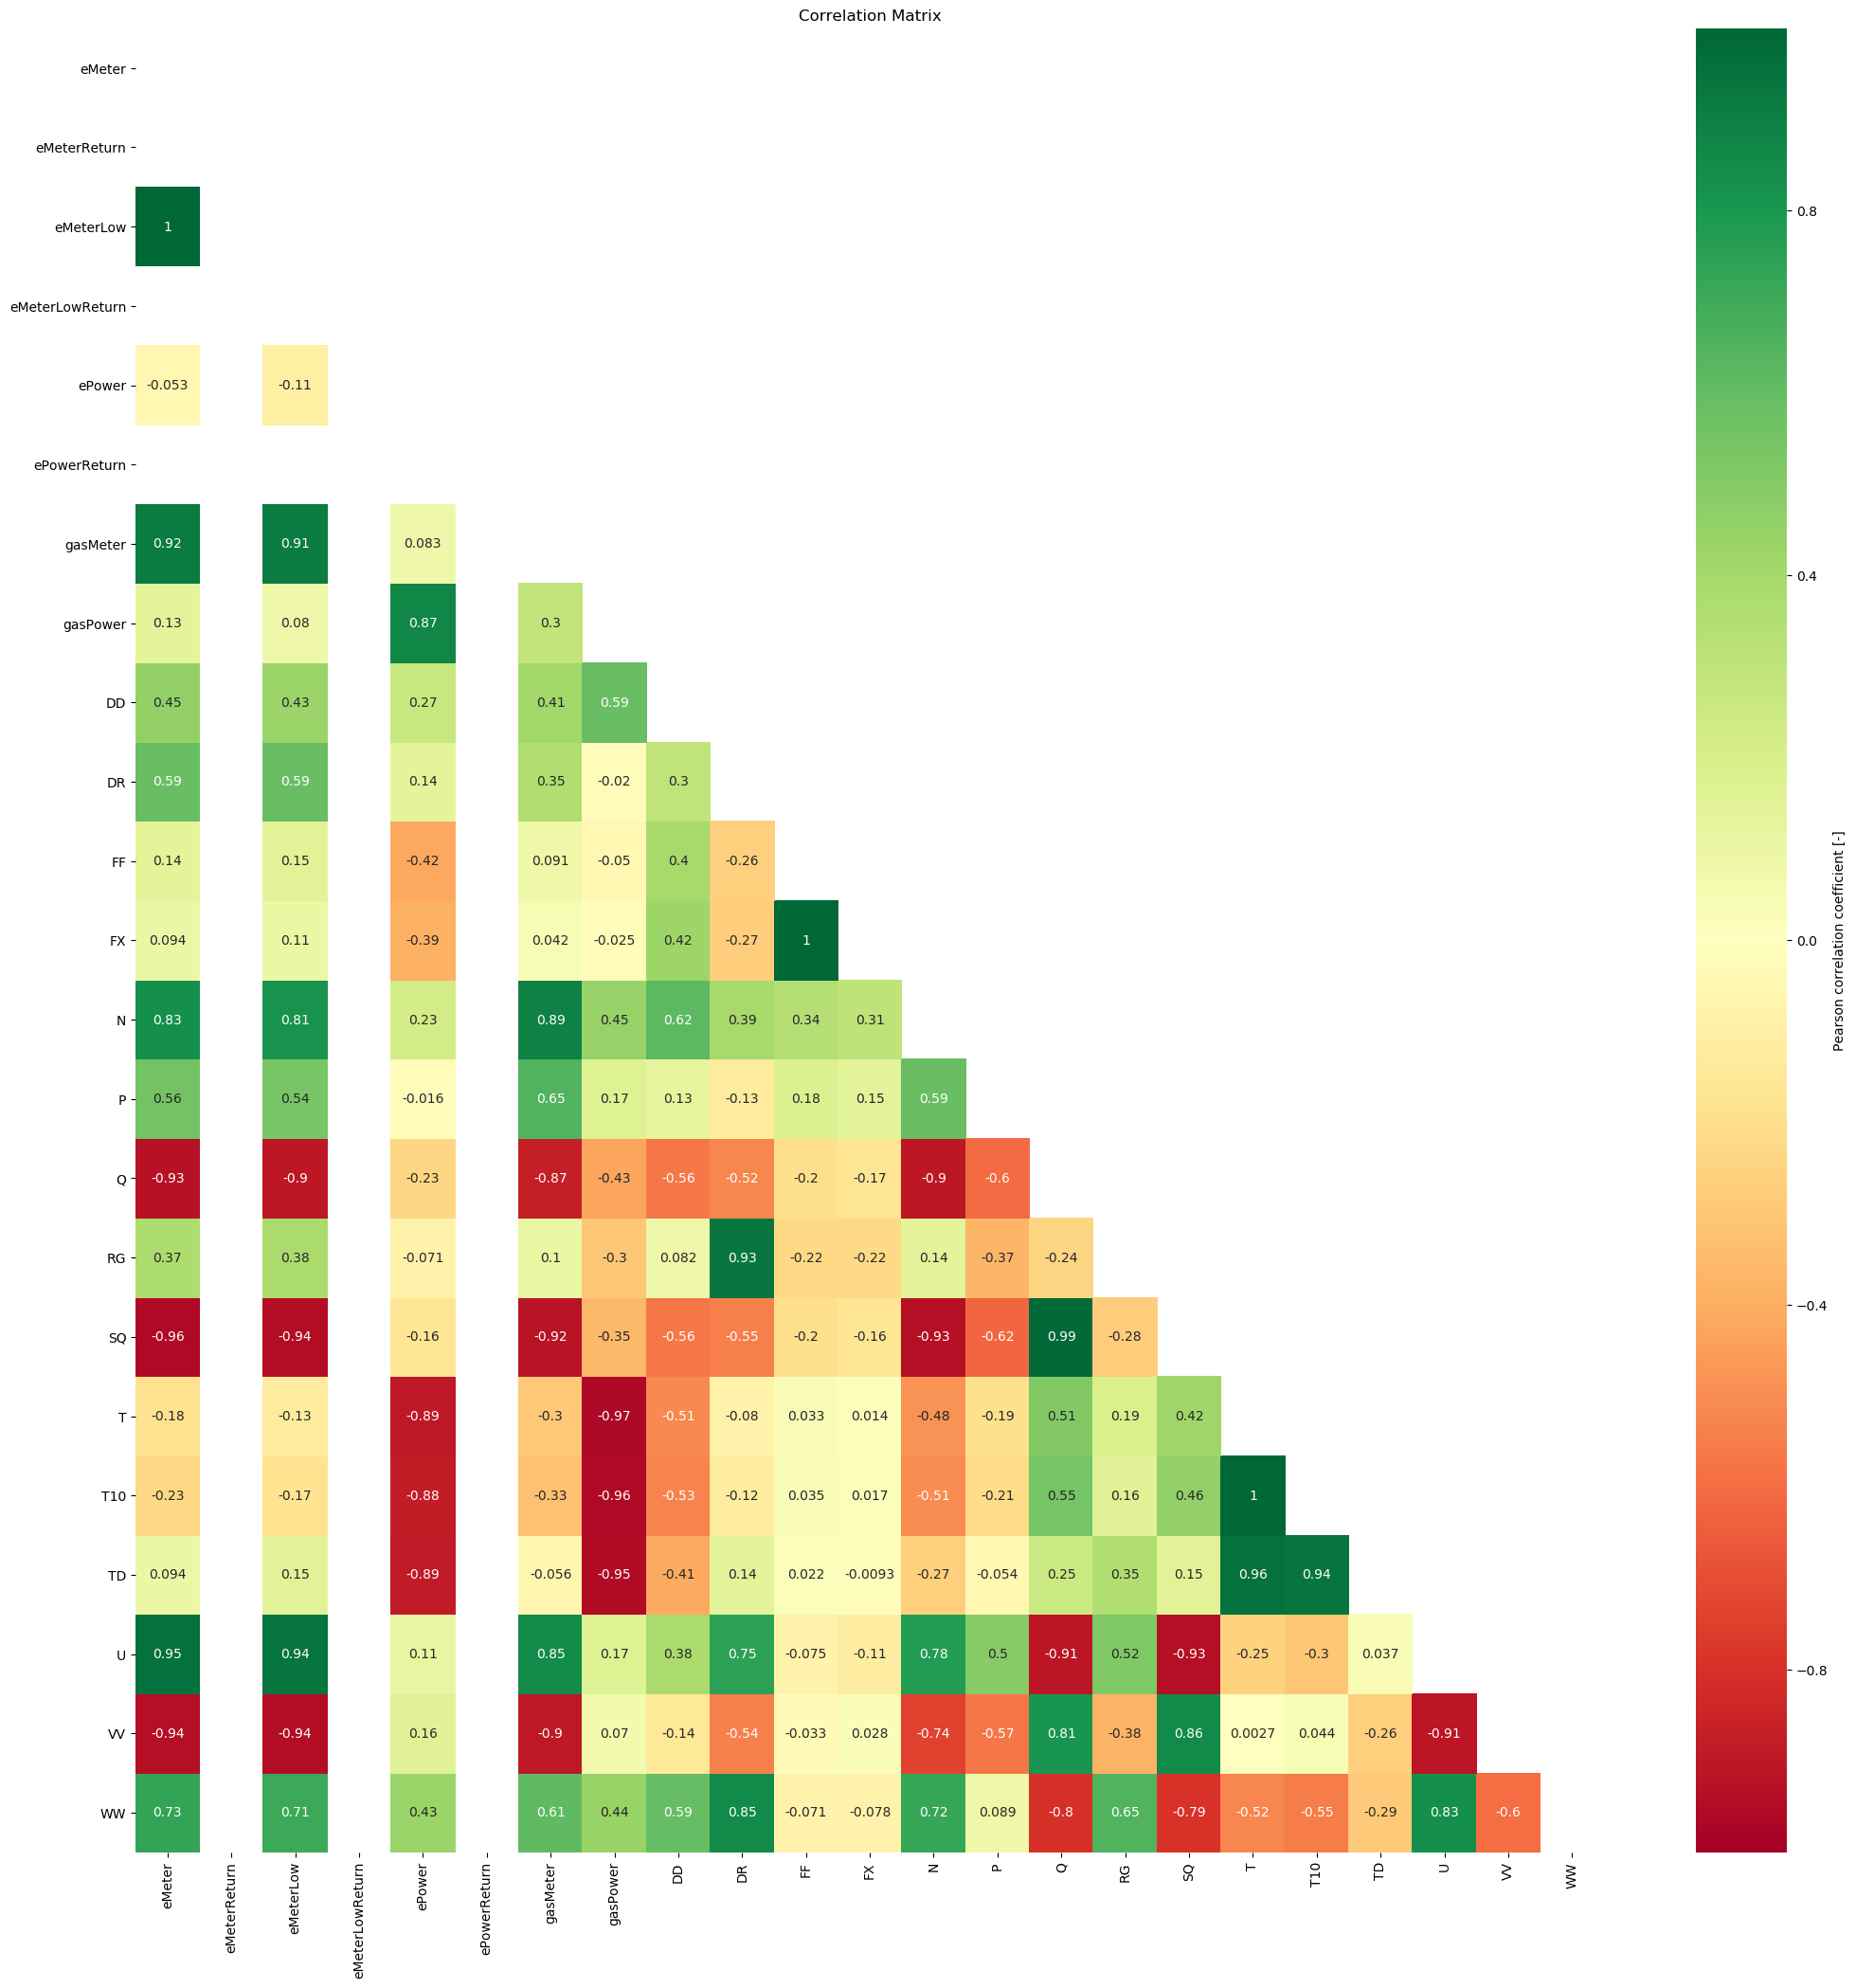

In [13]:
corr = df1mon.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(25,25))

sns.heatmap(corr, mask=mask, square=False, cmap='RdYlGn', annot=True, ax=ax,
            cbar_kws={'label':'Pearson correlation coefficient [-]'})

plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
#plt.savefig('sample.png', dpi=500)
plt.show()


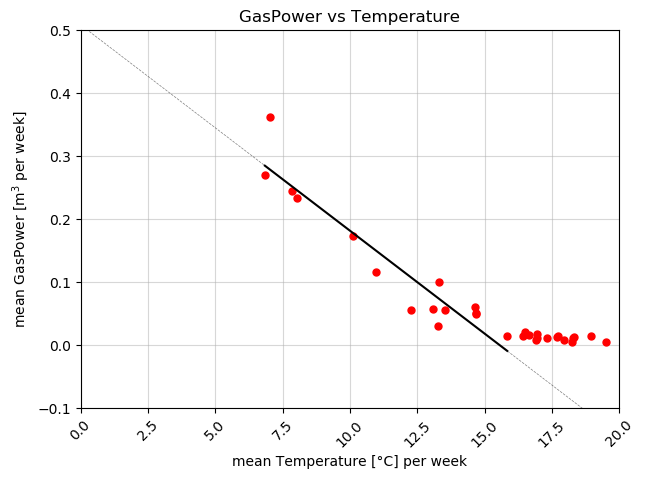

In [48]:
plt.title('GasPower vs Temperature')

plt.plot(df1w['T'][:],df1w['gasPower'][:], '.', color='r', ms=10)
plt.ylabel('mean GasPower [m$^3$ per week]')
plt.xlabel('mean Temperature [°C] per week')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig('sample2.png', dpi=1000)

params = np.polyfit(rdf1w['T'],rdf1w['gasPower'], 1)
def model(x, a, b):
    return a * x + b

# Extrapolatie
x = np.array([0,20])
plt.plot(x, model(x, *params), 'k--', alpha=0.5, linewidth=0.5)

# Fit
x = np.array([min(rdf1w['T']), max(rdf1w['T'])])
plt.plot(x, model(x, *params), 'k-')

plt.xlim(0,20)
plt.ylim(-0.1, 0.5)

plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[  8.04500001  10.95460315  12.25700397  15.84075397  13.07198413
  13.27620043  14.68435518  13.52645833  14.67615079  14.64172618
  13.30298612  10.12490079   6.84282739   7.85731151   7.04701754].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [25]:
params = np.polyfit(rdf1w['T'],rdf1w['gasPower'], 1)

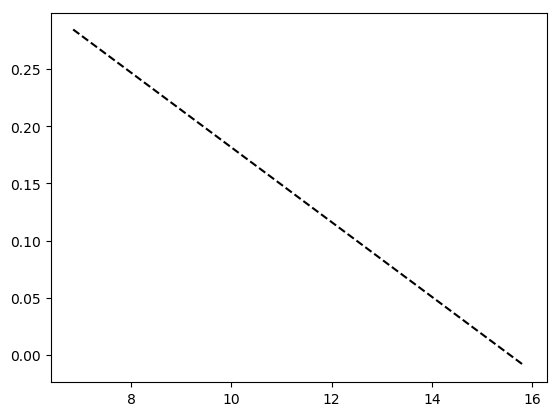

In [26]:
def model(x, a, b):
    return a * x + b

x = np.array([min(rdf1w['T']), max(rdf1w['T'])])

plt.plot(x, model(x, *params), 'k--')

ValueError: view limit minimum -36825.502531243656 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36825.502531243656 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 640x480 with 2 Axes>